<a href="https://colab.research.google.com/github/ZungLV/AI/blob/main/AI_LeVietDung_20146237_W4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# tai fuzzy
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=9e4e4722928ddd1a4a652618fb3d19d05149a4aa1f4f37f331c8f5bf6742fb12
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
#bao thu vien
import numpy as np
import skfuzzy as fz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

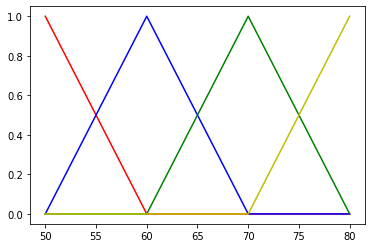

In [ ]:
#tao mang X
x=np.arange(50,81,1)
#tao cac do tuoi bang tam giac
slow = fz.trimf(x,[50,50,60])
medium = fz.trimf(x,[50,60,70])
medium_first = fz.trimf(x,[60,70,80])
full_speed = fz.trimf(x,[70,80,80])
#tao bieu do
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium,'b',linewidth=1.5,label='medium')
plt.plot(x,medium_first,'g',linewidth=1.5,label='medium_first')
plt.plot(x,full_speed,'y',linewidth=1.5,label='full_speed')

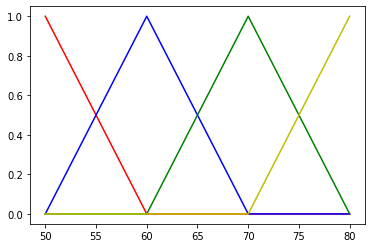

In [ ]:
#tao cac do tuoi bang hinh thang
slow = fz.trapmf(x,[50,50,50,60])
medium = fz.trapmf(x,[50,60,60,70])
medium_first = fz.trapmf(x,[60,70,70,80])
full_speed = fz.trapmf(x,[70,80,80,80])
#tao bieu do
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium,'b',linewidth=1.5,label='medium')
plt.plot(x,medium_first,'g',linewidth=1.5,label='medium_first')
plt.plot(x,full_speed,'y',linewidth=1.5,label='full_speed')

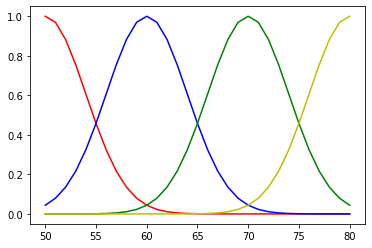

In [ ]:
#tao cac do tuoi bang parabol
slow = fz.gaussmf(x,50,4)
medium = fz.gaussmf(x,60,4)
medium_first = fz.gaussmf(x,70,4)
full_speed = fz.gaussmf(x,80,4)
#tao bieu do
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium,'b',linewidth=1.5,label='medium')
plt.plot(x,medium_first,'g',linewidth=1.5,label='medium_first')
plt.plot(x,full_speed,'y',linewidth=1.5,label='full_speed')

In [ ]:
#tao bien dau vao food
food = ctrl.Antecedent(np.arange(0,11,1),'food')
#tao bien dau vao service
service = ctrl.Antecedent(np.arange(0,11,1),'service')
#tao bien dau ra tip
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

In [ ]:
#tao gia tri cho tung phan tu food
food['poor']=fz.trimf(food.universe,[0,0,5])
food['average']=fz.trimf(food.universe,[0,5,10])
food['good']=fz.trimf(food.universe,[5,10,10])
#tao gia tri cho tung phan tu service
service['poor']=fz.trimf(service.universe,[0,0,4])
service['average']=fz.trimf(service.universe,[2,5,9])
service['good']=fz.trimf(service.universe,[6,10,10])
#tao gia tri cho tung phan tu tip
tip['Less']=fz.trimf(tip.universe,[10,10,15])
tip['Medium']=fz.trimf(tip.universe,[10,20,30])
tip['Much']=fz.trimf(tip.universe,[17,30,30])

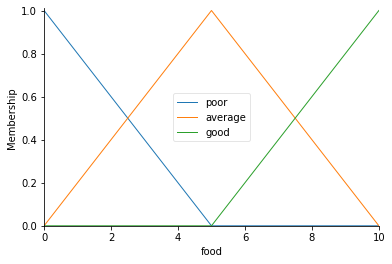

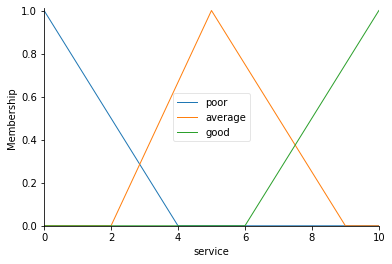

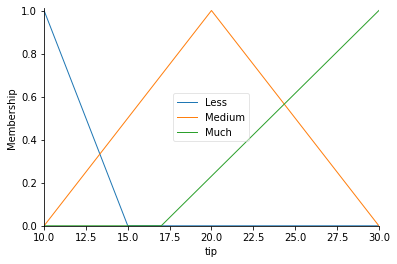

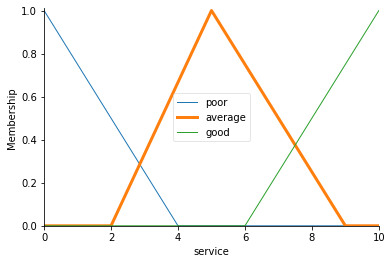

In [ ]:
#ve bieu do
food.view()
service.view()
tip.view()
service['average'].view()

In [ ]:
#tao 9 luat
rule1=ctrl.Rule(food['poor']&service['poor'],tip['Less'])
rule2=ctrl.Rule(food['average']&service['poor'],tip['Medium'])
rule3=ctrl.Rule(food['good']&service['poor'],tip['Much'])

rule4=ctrl.Rule(food['poor']&service['average'],tip['Less'])
rule5=ctrl.Rule(food['average']&service['average'],tip['Medium'])
rule6=ctrl.Rule(food['good']&service['average'],tip['Much'])

rule7=ctrl.Rule(food['poor']&service['good'],tip['Less'])
rule8=ctrl.Rule(food['average']&service['good'],tip['Medium'])
rule9=ctrl.Rule(food['good']&service['good'],tip['Much'])

20.24242424242424


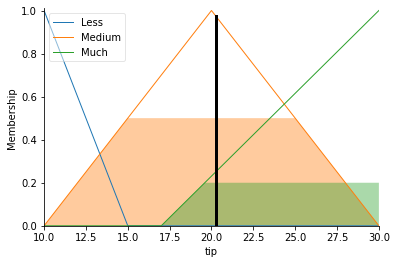

In [ ]:
#tao system ctrl
tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
#tao input
tipping.input['food']=6
tipping.input['service']=7
#tinh toan
tipping.compute()
#in gia tri voi bieu do
print(tipping.output['tip'])
tip.view(sim=tipping)

33.96341463414634


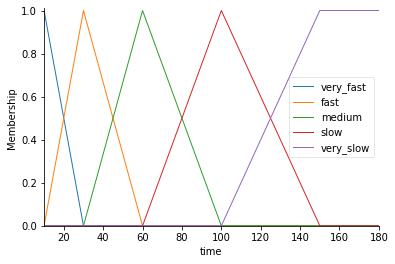

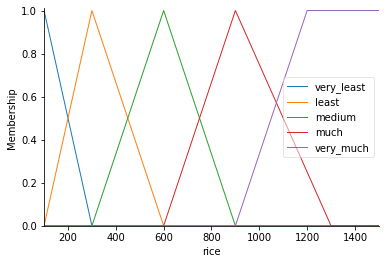

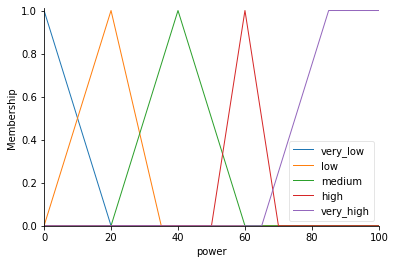

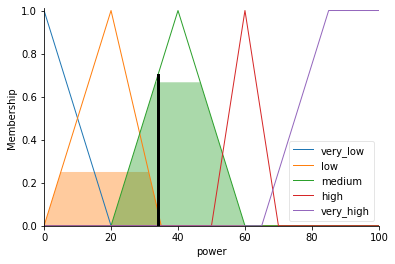

In [ ]:
#tao bien dau vao time
time = ctrl.Antecedent(np.arange(10,181,1),'time')
#tao bien dau vao rice
rice = ctrl.Antecedent(np.arange(100,1501,1),'rice')
#tao bien dau ra power
power = ctrl.Consequent(np.arange(0,101,1),'power')
#tao gia tri cho tung phan tu time
time['very_fast']=fz.trimf(time.universe,[10,10,30])
time['fast']=fz.trimf(time.universe,[10,30,60])
time['medium']=fz.trimf(time.universe,[30,60,100])
time['slow']=fz.trimf(time.universe,[60,100,150])
time['very_slow']=fz.trapmf(time.universe,[100,150,180,180])
#tao gia tri cho tung phan tu rice
rice['very_least']=fz.trimf(rice.universe,[100,100,300])
rice['least']=fz.trimf(rice.universe,[100,300,600])
rice['medium']=fz.trimf(rice.universe,[300,600,900])
rice['much']=fz.trimf(rice.universe,[600,900,1300])
rice['very_much']=fz.trapmf(rice.universe,[900,1200,1500,1500])
#tao gia tri cho tung phan tu power
power['very_low']=fz.trimf(power.universe,[0,0,20])
power['low']=fz.trimf(power.universe,[0,20,35])
power['medium']=fz.trimf(power.universe,[20,40,60])
power['high']=fz.trimf(power.universe,[50,60,70])
power['very_high']=fz.trapmf(power.universe,[65,85,100,100])
#ve bieu do
time.view()
rice.view()
power.view()
#tao 25 luat
rule1=ctrl.Rule(time['very_fast']&rice['very_least'],power['high'])
rule2=ctrl.Rule(time['very_fast']&rice['least'],power['high'])
rule3=ctrl.Rule(time['very_fast']&rice['medium'],power['high'])
rule4=ctrl.Rule(time['very_fast']&rice['much'],power['very_high'])
rule5=ctrl.Rule(time['very_fast']&rice['very_much'],power['very_high'])

rule6=ctrl.Rule(time['fast']&rice['very_least'],power['medium'])
rule7=ctrl.Rule(time['fast']&rice['least'],power['medium'])
rule8=ctrl.Rule(time['fast']&rice['medium'],power['high'])
rule9=ctrl.Rule(time['fast']&rice['much'],power['high'])
rule10=ctrl.Rule(time['fast']&rice['very_much'],power['very_high'])

rule11=ctrl.Rule(time['medium']&rice['very_least'],power['medium'])
rule12=ctrl.Rule(time['medium']&rice['least'],power['medium'])
rule13=ctrl.Rule(time['medium']&rice['medium'],power['medium'])
rule14=ctrl.Rule(time['medium']&rice['much'],power['medium'])
rule15=ctrl.Rule(time['medium']&rice['very_much'],power['medium'])

rule16=ctrl.Rule(time['slow']&rice['very_least'],power['low'])
rule17=ctrl.Rule(time['slow']&rice['least'],power['low'])
rule18=ctrl.Rule(time['slow']&rice['medium'],power['low'])
rule19=ctrl.Rule(time['slow']&rice['much'],power['medium'])
rule20=ctrl.Rule(time['slow']&rice['very_much'],power['medium'])

rule21=ctrl.Rule(time['very_slow']&rice['very_least'],power['very_low'])
rule22=ctrl.Rule(time['very_slow']&rice['least'],power['very_low'])
rule23=ctrl.Rule(time['very_slow']&rice['medium'],power['very_low'])
rule24=ctrl.Rule(time['very_slow']&rice['much'],power['low'])
rule25=ctrl.Rule(time['very_slow']&rice['very_much'],power['medium'])

#tao system ctrl
powering_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering=ctrl.ControlSystemSimulation(powering_ctrl)
#tao input
powering.input['rice']=700
powering.input['time']=70
#tinh toan
powering.compute()
#in gia tri voi bieu do
print(powering.output['power'])
power.view(sim=powering)